In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math
import itertools

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve,precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [2]:
dataset = pd.read_csv(r'C:\Users\sakam\Applied Machine Learning CPE 695\Project\GTZAN\Data\features_3_sec.csv')
print("Dataset imported successfully")
dataset.info()

Dataset imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64

In [3]:
dataset.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [4]:
dataset.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [5]:
dataset.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [6]:
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [7]:
dataset.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock
9989,rock.00099.9.wav,66149,0.369293,0.086759,0.050524,0.000067,1634.330126,411429.169769,1867.422378,119722.211518,...,38.801735,-11.598399,58.983097,-0.178517,55.761299,-6.903252,39.485901,-3.412534,31.727489,rock


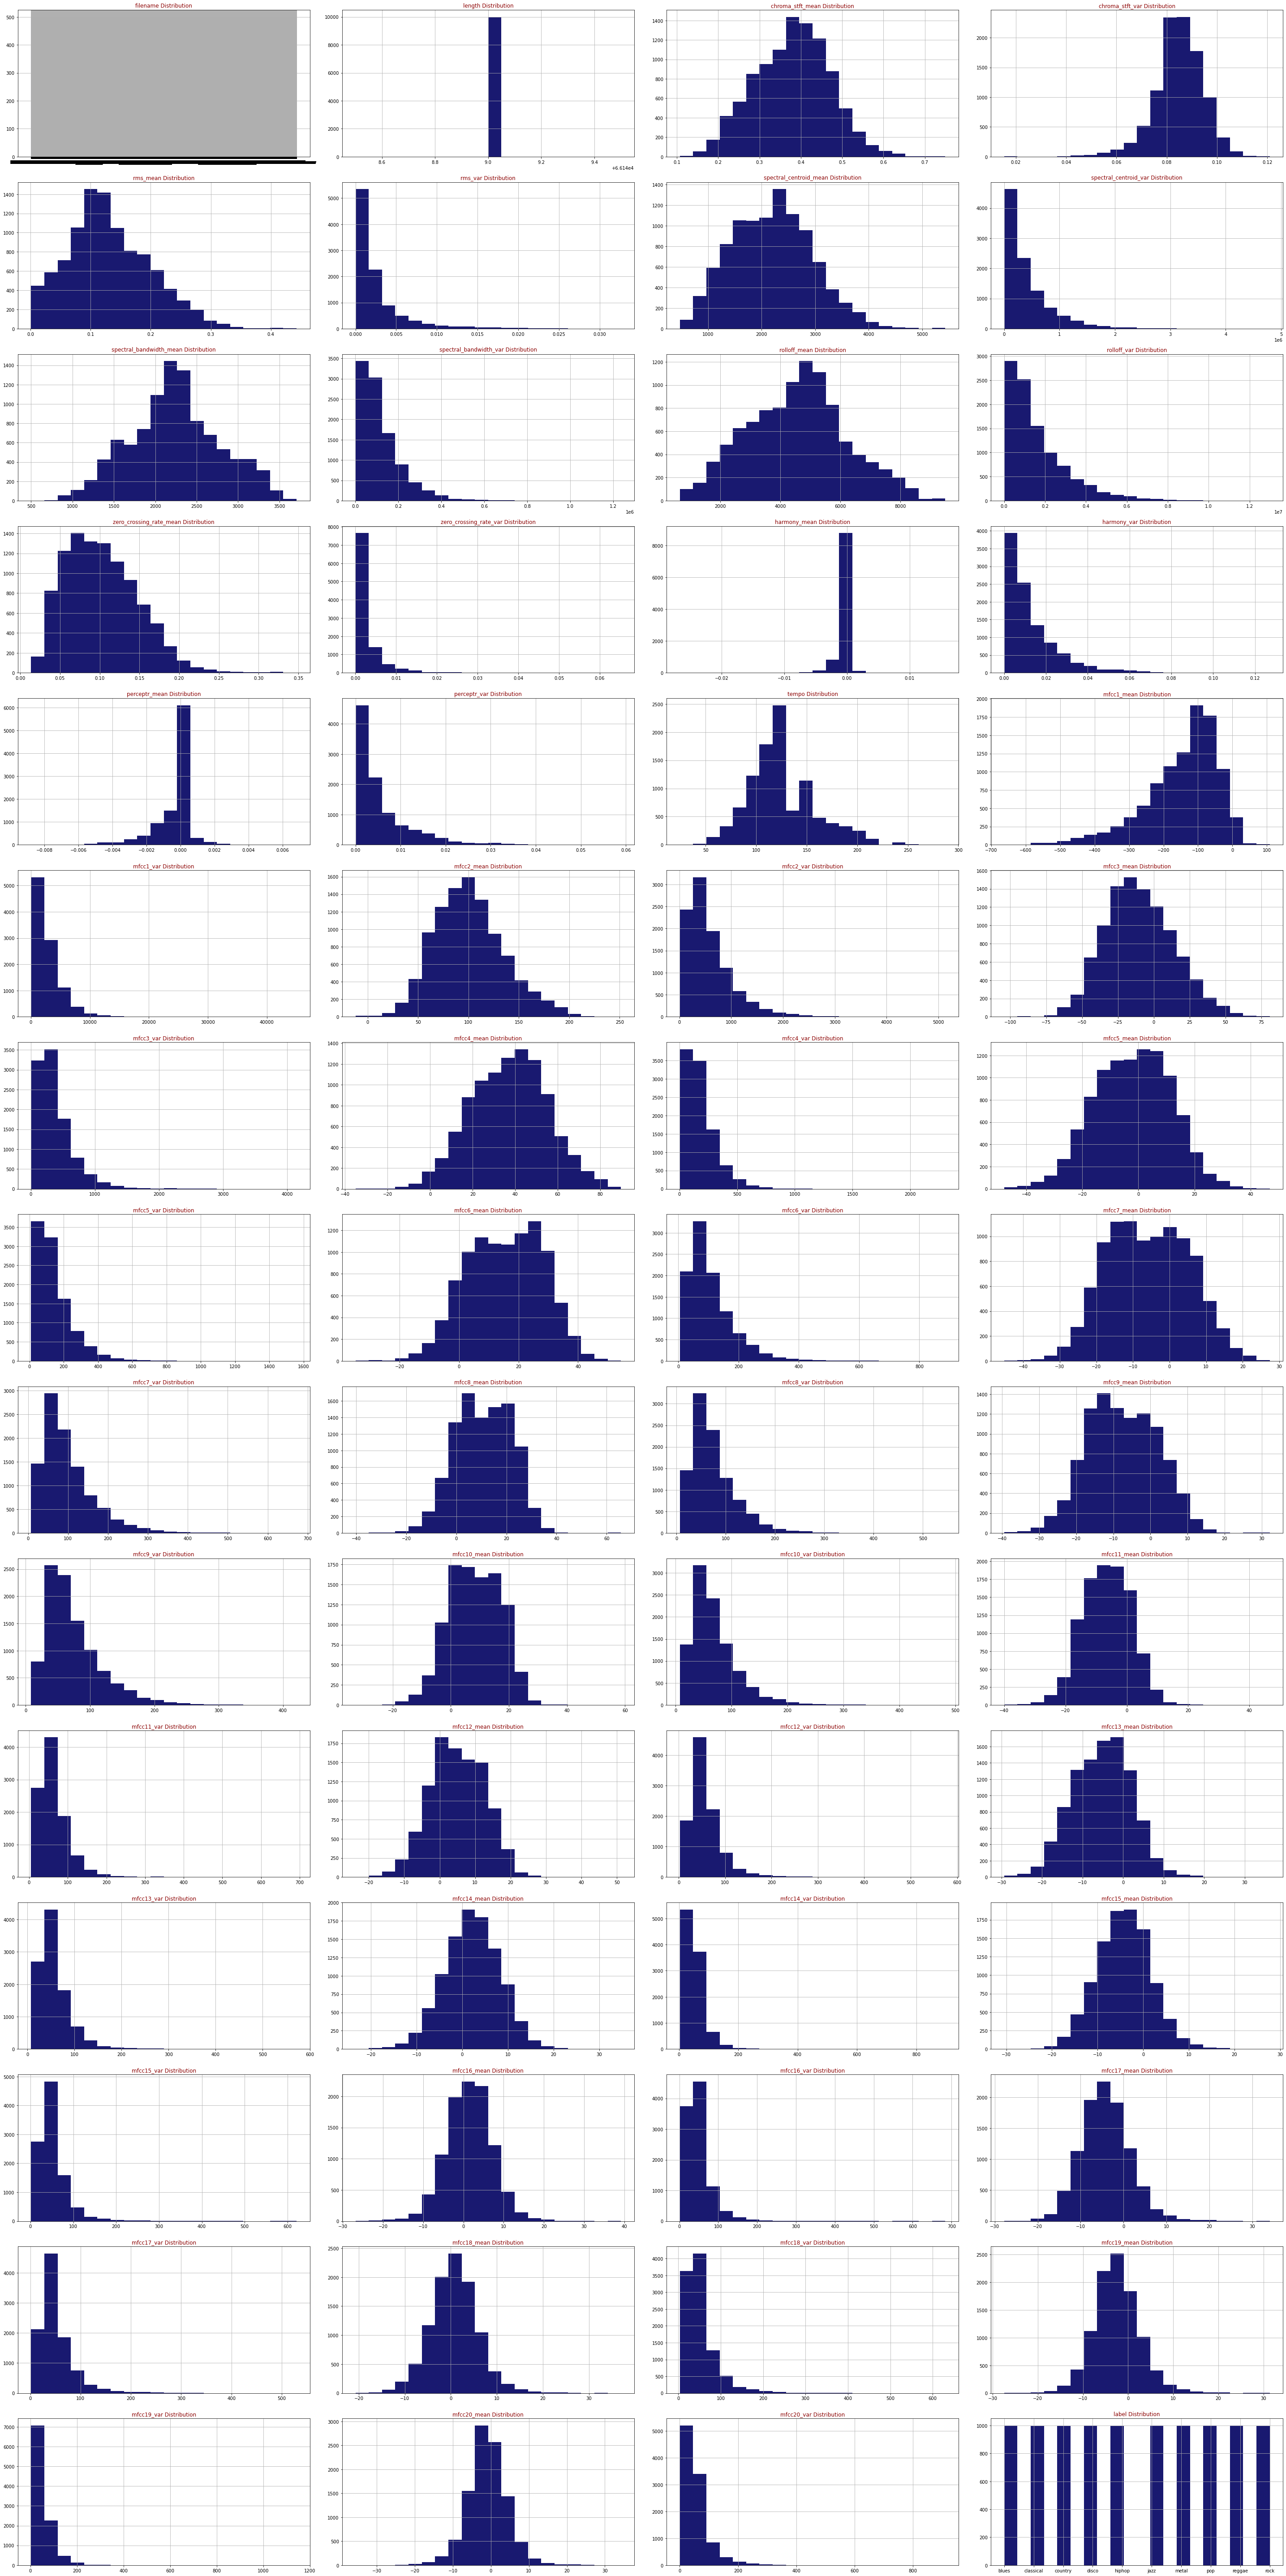

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(40,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        #ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(dataset,dataset.columns,15,4)

In [9]:
print(dataset["label"].value_counts())

blues        1000
metal        1000
reggae       1000
pop          1000
jazz         1000
disco         999
hiphop        998
classical     998
rock          998
country       997
Name: label, dtype: int64


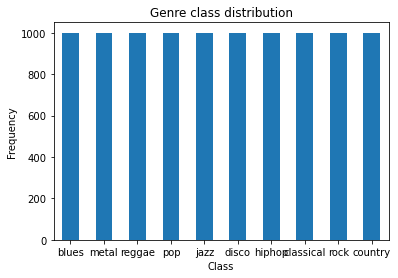

In [10]:
count_classes = pd.value_counts(dataset['label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Genre class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

Pie Chart:


Text(0, 0.5, '')

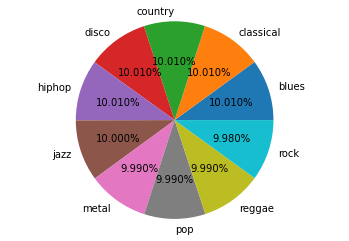

In [11]:

print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(dataset.label.value_counts(),autopct='%1.3f%%', labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
plt.axis('equal')
plt.ylabel('')

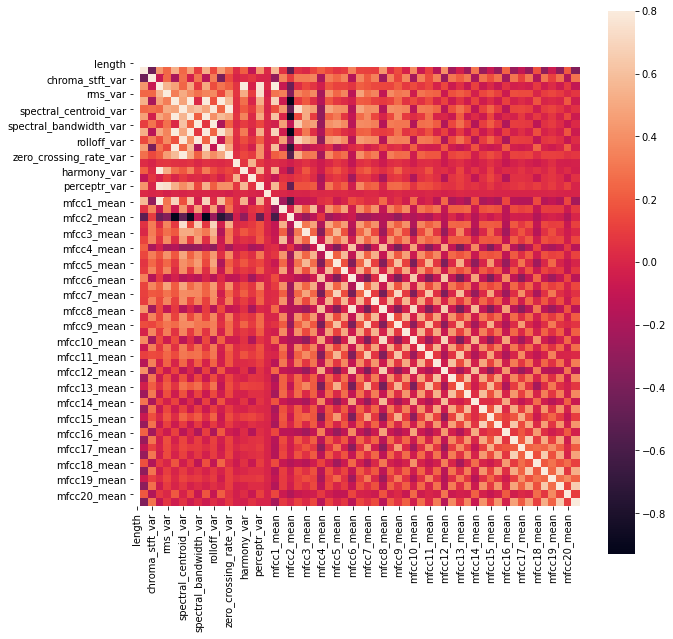

In [12]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()

In [6]:
from sklearn import preprocessing
dataset=dataset.iloc[0:,2:]
Y=dataset.loc[:,'label']
X=dataset.loc[:,dataset.columns!='label']

cols=X.columns
min_max_scaler=preprocessing.MinMaxScaler()
scaled_X=min_max_scaler.fit_transform(X) #the column names are removed
X=pd.DataFrame(scaled_X,columns=cols)

In [7]:
le=LabelEncoder()
labels=le.fit_transform(Y)
X_train,X_test,y_train,y_test=train_test_split(X,labels,test_size=0.3,random_state=21)

In [8]:
def model_fit(model,title):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return preds

In [9]:
def plot_confusion_matrix(y_test,predict):
    cm = confusion_matrix(y_test,predict)
    conf_matrix=pd.DataFrame(data=cm,columns=['blues_pred', 'classical_pred', 'country_pred', 'disco_pred', 'hiphop_pred', 'jazz_pred', 'metal_pred', 'pop_pred', 'reggae_pred', 'rock_pred'],index=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')

In [10]:
# Function to plot roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

In [11]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return (roc_auc_score(y_test, y_pred, average=average))

### Support Vector Machine 

In [19]:
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_fit(svm, "of Support Vector Machine")

Accuracy Support Vector Machine : 0.74274 



array([6, 6, 4, ..., 5, 1, 9])

### Hyper parameter tuning using GridSearchCV()

In [20]:
from sklearn import svm
from sklearn.svm import SVC
svm_model = GridSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }, 
    cv=5, 
    return_train_score=False)
svm_model.fit(X_train, y_train)
svm_model.cv_results_

{'mean_fit_time': array([1.02495503, 3.49447346, 2.91186643, 2.85073776, 0.93742762,
        3.09514618, 1.91495352, 1.70946836, 1.0223278 , 2.62802911,
        1.75747538, 1.78095088]),
 'std_fit_time': array([0.07542477, 0.28029995, 0.19800981, 0.1981071 , 0.09454397,
        0.16947569, 0.08674722, 0.06446517, 0.07736808, 0.09154396,
        0.11442802, 0.10413135]),
 'mean_score_time': array([0.361342  , 0.45072684, 0.58337016, 0.47804742, 0.29786539,
        0.50478926, 0.56401439, 0.46584015, 0.26519055, 0.51902437,
        0.49638433, 0.57790256]),
 'std_score_time': array([0.04064922, 0.01404918, 0.0662688 , 0.01050306, 0.03889682,
        0.07957673, 0.05153849, 0.01451089, 0.01424393, 0.05836924,
        0.04474431, 0.06100485]),
 'param_C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10, 20, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object

In [21]:
df = pd.DataFrame(svm_model.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.024955,0.075425,0.361342,0.040649,1,linear,"{'C': 1, 'kernel': 'linear'}",0.731951,0.709793,0.726948,0.725322,0.706724,0.720148,0.009998,3
1,3.494473,0.280300,0.450727,0.014049,1,poly,"{'C': 1, 'kernel': 'poly'}",0.124375,0.125804,0.112938,0.115165,0.110873,0.117831,0.006097,12
2,2.911866,0.198010,0.583370,0.066269,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.514653,0.504646,0.531094,0.520744,0.514306,0.517089,0.008695,8
3,2.850738,0.198107,0.478047,0.010503,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.461044,0.453181,0.465332,0.456366,0.457082,0.458601,0.004194,10
4,0.937428,0.094544,0.297865,0.038897,10,linear,"{'C': 10, 'kernel': 'linear'}",0.754110,0.732666,0.759828,0.761803,0.747496,0.751181,0.010512,2
5,3.095146,0.169476,0.504789,0.079577,10,poly,"{'C': 10, 'kernel': 'poly'}",0.426019,0.416726,0.427448,0.429900,0.413448,0.422708,0.006429,11
6,1.914954,0.086747,0.564014,0.051538,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.692638,0.674768,0.701215,0.685265,0.681688,0.687115,0.009107,5
7,1.709468,0.064465,0.465840,0.014511,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.646176,0.636169,0.664761,0.654506,0.635908,0.647504,0.011059,7
8,1.022328,0.077368,0.265191,0.014244,20,linear,"{'C': 20, 'kernel': 'linear'}",0.758399,0.739814,0.760543,0.765379,0.747496,0.754326,0.009324,1
9,2.628029,0.091544,0.519024,0.058369,20,poly,"{'C': 20, 'kernel': 'poly'}",0.463903,0.453896,0.465332,0.464235,0.454220,0.460317,0.005133,9


In [22]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.720148
1,1,poly,0.117831
2,1,rbf,0.517089
3,1,sigmoid,0.458601
4,10,linear,0.751181
5,10,poly,0.422708
6,10,rbf,0.687115
7,10,sigmoid,0.647504
8,20,linear,0.754326
9,20,poly,0.460317


In [23]:
svm_model.best_params_

{'C': 20, 'kernel': 'linear'}

In [24]:
# Support Vector Machine
svm_ = SVC(C = 10, kernel = 'linear', decision_function_shape="ovo", probability=True)
predict = model_fit(svm_, "of Support Vector Machine after performing hyperparameter tuning")

Accuracy of Support Vector Machine after performing hyperparameter tuning : 0.74241 



              precision    recall  f1-score   support

           0       0.66      0.84      0.74       290
           1       0.92      0.94      0.93       284
           2       0.68      0.66      0.67       310
           3       0.63      0.70      0.66       299
           4       0.74      0.66      0.70       319
           5       0.81      0.84      0.83       278
           6       0.86      0.86      0.86       323
           7       0.80      0.82      0.81       294
           8       0.72      0.61      0.66       309
           9       0.61      0.51      0.55       291

    accuracy                           0.74      2997
   macro avg       0.74      0.74      0.74      2997
weighted avg       0.74      0.74      0.74      2997



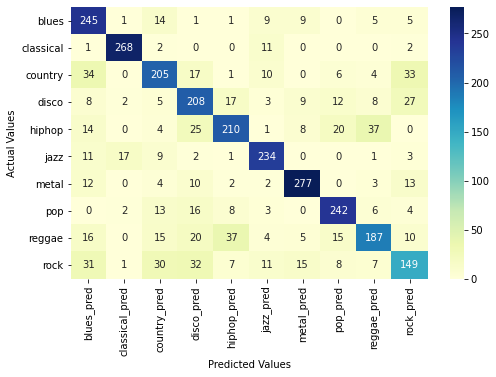

In [25]:
plot_confusion_matrix(y_test,predict)
print(classification_report(y_test, predict))

In [26]:
svm_pred_test_prob = svm_.predict_proba(X_test)[:, 1]

In [27]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, svm_pred_test_prob, pos_label=1)

In [28]:
svm_auc = multiclass_roc_auc_score(y_test, predict, average="macro")
svm_auc

0.8578576389778215

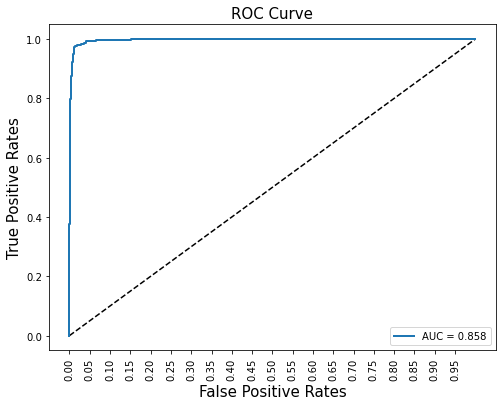

In [29]:
plot_roc_curve(fpr=svm_fpr, tpr=svm_tpr, label="AUC = %.3f" % svm_auc)

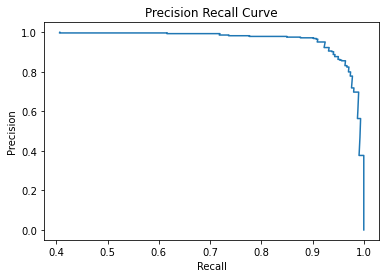

In [30]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, svm_pred_test_prob, pos_label=1)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

### KNN

In [31]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_fit(knn, "of KNN")


Accuracy of KNN : 0.8038 



array([6, 6, 4, ..., 2, 1, 9])

### Hyper parameter tuning using GridSearchCV()

In [12]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
knn_gs.fit(X_train, y_train)
knn_gs.cv_results_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   54.0s finished


{'mean_fit_time': array([0.10934909, 0.09893537, 0.1289738 , 0.1390938 , 0.11257482,
        0.11905932, 0.11138956, 0.1197869 , 0.10788043, 0.10871561,
        0.11086949, 0.12284962, 0.10843213, 0.11044518, 0.10934838,
        0.10414402, 0.12354032, 0.11308153, 0.14340742, 0.14002371,
        0.13145455, 0.13440609, 0.1871206 , 0.12832395, 0.12267097,
        0.11436065, 0.11070426, 0.11535764, 0.11237009, 0.13448262,
        0.16472475, 0.1541303 , 0.12817589, 0.14655455, 0.14020554,
        0.12585624]),
 'std_fit_time': array([2.97360213e-07, 7.36322302e-03, 2.77492603e-02, 9.79984201e-03,
        3.32117248e-03, 9.05145883e-03, 1.71206866e-03, 4.41817926e-03,
        4.99244457e-03, 6.38880059e-03, 1.07513801e-03, 1.03263678e-02,
        8.00128565e-03, 1.55021739e-03, 5.94720425e-07, 7.36400976e-03,
        9.32148589e-03, 4.01664497e-04, 1.58263110e-02, 9.04666240e-03,
        3.37254734e-03, 9.57546875e-03, 7.75258345e-02, 1.38503616e-02,
        7.23711791e-03, 5.54249361e-0

In [13]:
df_knn_gs = pd.DataFrame(knn_gs.cv_results_)
df_knn_gs


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109349,2.973602e-07,3.457220,0.060277,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.853711,0.848563,0.842128,0.848134,0.004738,9
1,0.098935,7.363223e-03,3.346045,0.008939,minkowski,5,distance,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.869155,0.871729,0.862720,0.867868,0.003789,3
2,0.128974,2.774926e-02,3.758999,0.285832,minkowski,7,uniform,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.833548,0.828829,0.821107,0.827828,0.005128,19
3,0.139094,9.799842e-03,4.032473,0.067823,minkowski,7,distance,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.852853,0.853711,0.847705,0.851423,0.002652,7
4,0.112575,3.321172e-03,4.207775,0.086142,minkowski,9,uniform,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei...",0.818104,0.814243,0.804376,0.812241,0.005780,25
5,0.119059,9.051459e-03,3.468528,0.366249,minkowski,9,distance,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei...",0.844273,0.840412,0.833119,0.839268,0.004625,13
6,0.111390,1.712069e-03,3.423214,0.045959,minkowski,11,uniform,"{'metric': 'minkowski', 'n_neighbors': 11, 'we...",0.804376,0.807808,0.785500,0.799228,0.009808,30
7,0.119787,4.418179e-03,3.276376,0.039437,minkowski,11,distance,"{'metric': 'minkowski', 'n_neighbors': 11, 'we...",0.836122,0.833548,0.821107,0.830259,0.006556,17
8,0.107880,4.992445e-03,3.305435,0.021849,minkowski,13,uniform,"{'metric': 'minkowski', 'n_neighbors': 13, 'we...",0.798370,0.791506,0.771772,0.787216,0.011274,33
9,0.108716,6.388801e-03,3.259027,0.063468,minkowski,13,distance,"{'metric': 'minkowski', 'n_neighbors': 13, 'we...",0.829258,0.824539,0.809095,0.820964,0.008611,22


In [14]:
df_knn_gs[['param_n_neighbors','param_weights','param_metric','mean_test_score']]

,param_n_neighbors,param_weights,param_metric,mean_test_score
0,5,uniform,minkowski,0.848134
1,5,distance,minkowski,0.867868
2,7,uniform,minkowski,0.827828
3,7,distance,minkowski,0.851423
4,9,uniform,minkowski,0.812241
5,9,distance,minkowski,0.839268
6,11,uniform,minkowski,0.799228
7,11,distance,minkowski,0.830259
8,13,uniform,minkowski,0.787216
9,13,distance,minkowski,0.820964


In [15]:
knn_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [16]:
# KNN
knn_ = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5, weights = 'distance')
predict = model_fit(knn_, "of KNN after performing hyperparameter tuning")


Accuracy of KNN after performing hyperparameter tuning : 0.92092 



              precision    recall  f1-score   support

           0       0.95      0.90      0.92       290
           1       0.93      0.98      0.95       284
           2       0.88      0.91      0.90       310
           3       0.86      0.93      0.89       299
           4       0.97      0.92      0.94       319
           5       0.93      0.91      0.92       278
           6       0.97      0.95      0.96       323
           7       0.96      0.90      0.93       294
           8       0.90      0.96      0.93       309
           9       0.88      0.86      0.87       291

    accuracy                           0.92      2997
   macro avg       0.92      0.92      0.92      2997
weighted avg       0.92      0.92      0.92      2997



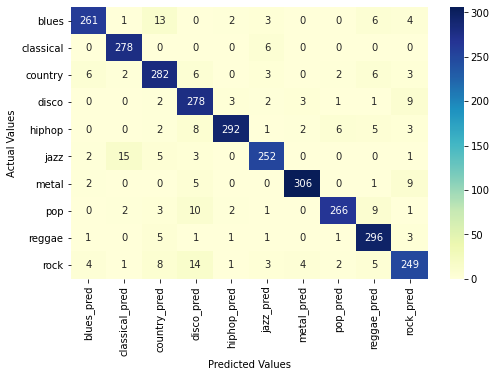

In [17]:
plot_confusion_matrix(y_test,predict)
print(classification_report(y_test, predict))

In [38]:
knn_pred_test_prob = knn_.predict_proba(X_test)[:, 1]

In [39]:
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_pred_test_prob, pos_label=1)

In [40]:
knn_auc = multiclass_roc_auc_score(y_test, predict, average="macro")
knn_auc

0.9559021698428198

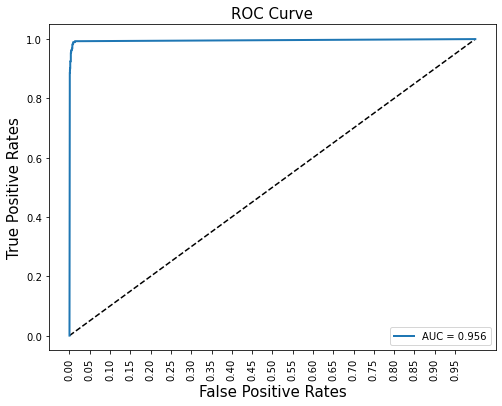

In [41]:
plot_roc_curve(fpr=knn_fpr, tpr=knn_tpr, label="AUC = %.3f" % knn_auc)

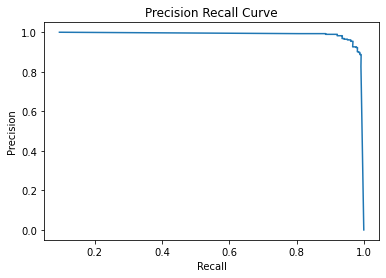

In [42]:
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, knn_pred_test_prob, pos_label=1)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()